In [1]:
#<img src="cubes.png">

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("database.csv", sep="\t")

In [3]:
# Creazione funzione per convertire i secondi in minuti e secondi
def convert_seconds(seconds):
    minutes, seconds = divmod(seconds, 60)
    minutes = int(minutes)
    seconds = round(seconds, 2)
    return f"{minutes}:{seconds}"

In [4]:
def calculate_avg_last_5(dataframe):
# Calcola la media delle ultime 5 risoluzioni di un certo tipo di cubo
    last_five = dataframe.tail(5)["Secondi"]
    media_soluzioni, tempi_totali = 0, 0
    for tempo in last_five:
        tempi_totali = tempi_totali + tempo
    media_soluzioni = tempi_totali / 5
    media_in_minuti = convert_seconds(media_soluzioni)
    print("Media delle ultime 5 risoluzioni:", media_in_minuti)

In [ ]:
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(convert_seconds))

In [6]:
# Ultime 10 risoluzioni
df.tail(10)

,Data,Secondi,Tempo,Cubo
173,2025-10-25,64.48,1:4.48,3x3
174,2025-10-25,84.39,1:24.39,3x3
175,2025-11-02,821.27,13:41.27,5x5
176,2025-11-02,245.62,4:5.62,4x4
177,2025-11-02,225.30,3:45.3,4x4
178,2025-11-02,243.47,4:3.47,4x4
179,2025-11-02,247.75,4:7.75,4x4
180,2025-11-02,281.14,4:41.14,4x4
181,2025-11-02,243.64,4:3.64,4x4
182,2025-11-08,281.50,4:41.5,4x4


# Record personali per tipo di cubo 🥇🥈🥉

In [7]:
# Record personali per tipo di cubo

list_index_records = [] 
cube_types = df["Cubo"].drop_duplicates()
for cube_type in cube_types:
    the_index = df[df["Cubo"] == cube_type].sort_values("Secondi").head(1).index
    list_index_records.append(the_index[0])

df[["Data", "Tempo", "Cubo"]].iloc[list_index_records]

,Data,Tempo,Cubo
94,2025-05-03,0:44.56,3x3
84,2025-03-21,0:15.12,2x2
112,2025-05-28,3:58.89,Mirror
156,2025-08-30,7:59.65,5x5
157,2025-09-21,3:30.86,4x4
48,2025-02-09,30:10.61,Megaminx


In [8]:
# Oppure si puo fare anche in questo modo
df.groupby(by="Cubo").min().sort_values(by="Secondi").drop(columns=["Data", "Secondi"])
# Senza il drop avrebbe mostrato la data sbagliata in quanto prende pure la data minima in quanto applica min su tutte le colonne
# Anche la colonna Tempo non ha i risultati in ordine per questo motivo

,Tempo
Cubo,
2x2,0:15.12
3x3,0:44.56
4x4,3:30.86
Mirror,12:24.1
5x5,10:33.18
Megaminx,30:10.61


In [9]:
# Oppure si puo fare anche in questo altro modo
df.groupby(by="Cubo")["Tempo"].min()

Cubo
2x2          0:15.12
3x3          0:44.56
4x4          3:30.86
5x5         10:33.18
Megaminx    30:10.61
Mirror       12:24.1
Name: Tempo, dtype: object

Text(0.5, 0, 'Cubi')

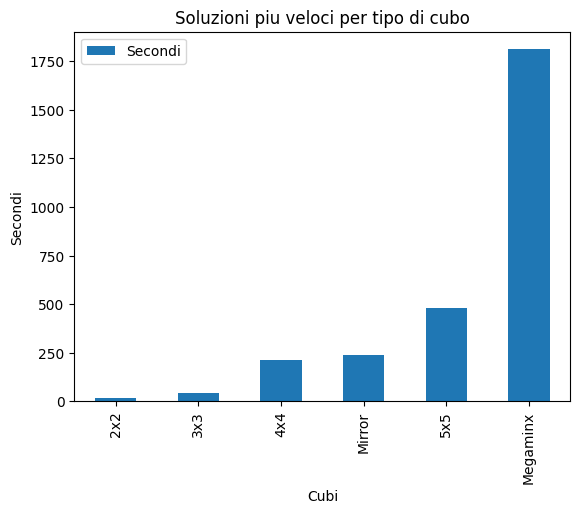

In [10]:
df.groupby(by="Cubo").min().sort_values(by="Secondi").plot.bar()
plt.title("Soluzioni piu veloci per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [11]:
# Medie dei tempi di risoluzione
medie_df = df.groupby(by="Cubo")["Secondi"].mean().round(2)
medie_df

Cubo
2x2           62.49
3x3           75.55
4x4          268.11
5x5          727.32
Megaminx    2155.38
Mirror       537.60
Name: Secondi, dtype: float64

In [12]:
# Medie dei tempi di risoluzione in minuti e secondi
print("Cubo Minuti")
for i, s in medie_df.items():
    print(i, convert_seconds(s))

Cubo Minuti
2x2 1:2.49
3x3 1:15.55
4x4 4:28.11
5x5 12:7.32
Megaminx 35:55.38
Mirror 8:57.6


Text(0.5, 0, 'Cubi')

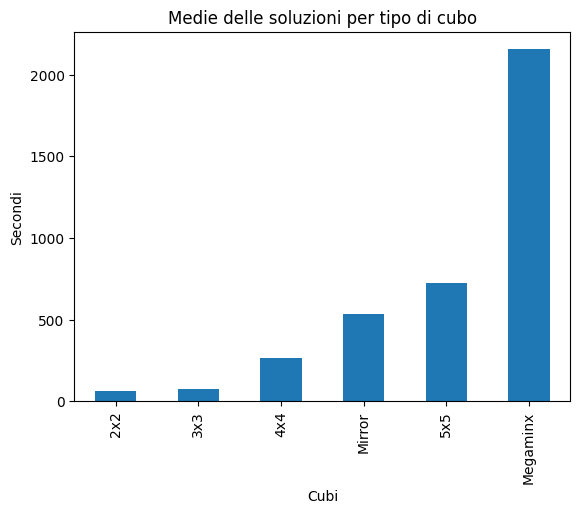

In [13]:
df.groupby(by="Cubo")["Secondi"].mean().sort_values().plot.bar()
plt.title("Medie delle soluzioni per tipo di cubo")
plt.ylabel("Secondi")
plt.xlabel("Cubi")

In [14]:
# Numero di volte che ho risolto i cubi
df["Cubo"].value_counts()

Cubo
3x3         58
2x2         45
4x4         45
5x5         24
Mirror       8
Megaminx     3
Name: count, dtype: int64

Text(0.5, 0, 'Cubi')

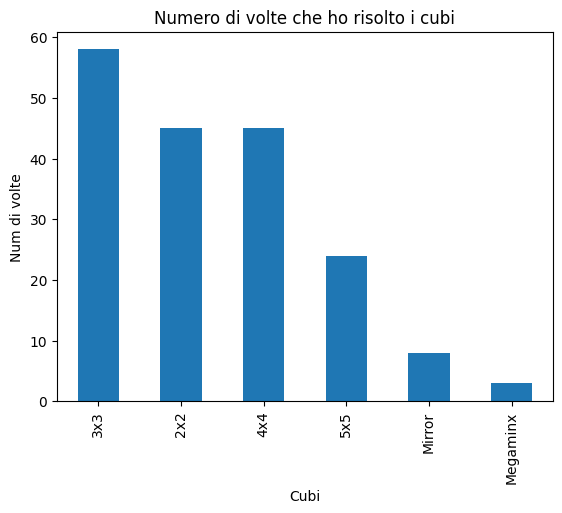

In [15]:
df["Cubo"].value_counts().plot.bar()
plt.title("Numero di volte che ho risolto i cubi")
plt.ylabel("Num di volte")
plt.xlabel("Cubi")

In [16]:
# Detaframe delle soluzioni del cubo 2x2
df_2x2 = df[df["Cubo"] == "2x2"].sort_values(by="Secondi")
# df_2x2

In [17]:
# Detaframe delle soluzioni del cubo 3x3
df_3x3 = df[df["Cubo"] == "3x3"].sort_values(by="Secondi")
# df_3x3

In [18]:
# Detaframe delle soluzioni del cubo 4x4
df_4x4 = df[df["Cubo"] == "4x4"].sort_values(by="Secondi")
# df_4x4

In [19]:
# Detaframe delle soluzioni del cubo 5x5
df_5x5 = df[df["Cubo"] == "5x5"].sort_values(by="Secondi")
# df_5x5

In [20]:
calculate_avg_last_5(df_5x5)

Media delle ultime 5 risoluzioni: 15:51.82
